# Droplet spreading over a flat surface against static contact angle $\theta_e$ -         Mesh convergence study
![Droplet_Spreading domain configuration](DropletSpreading.png)

For this case study, we have considered a droplet spreading on a flat surface ([dupont2010numerical](https://doi.org/10.1016/j.jcp.2009.07.034)) that allows for studying the effect of the static contact angle boundary condition and the Bond number, $Bo = \frac{\rho_l g R_0}{\sigma}$ on the equilibrium shape of the droplet. Ideally, for a droplet that spreads with $Bo\ll1$, surface tension forces dominate, and the droplet at equilibrium maintains a spherical cap shape and satisfies the contact angle boundary condition. On the other hand, for $Bo\gg1$, the gravitational forces dominate, and the droplet forms a puddle, whose height is directly proportional to the capillary length, $l_{Ca}=\sqrt{\frac{\sigma}{\rho_l g}}$. The conservation of the droplet’s volume $V$ with an equilibrium contact angle $\theta_e$ allows formulating the geometrical relations that define the equilibrium shape of the droplet ([dupont2010numerical](https://doi.org/10.1016/j.jcp.2009.07.034), [fricke2020geometry](https://arxiv.org/abs/2003.04914)). In addition to observing droplets at equilibrium, we have also studied the mesh convergence of the spreading droplets.

This notebook shows the mesh convergence of water_glycerol and water droplets against $\theta_e$.
#### Note: water_glycerol and water are labelled as 'wg' and 'w' respectively.

In [1]:
#Wetted Area 
#Loading the necessary files
import pandas as pd
import numpy as np
from vtk import vtkStructuredPointsReader
from vtk.util import numpy_support as VN
import csv
import sys
# for radians
import math
import os
import matplotlib.pyplot as plt
import re
import itertools
from matplotlib import rcParams
pi = np.pi
sin = np.sin
cos = np.cos

rcParams["figure.dpi"] = 600
fontSize = 8


sys.path.append(os.path.join(os.getcwd(), '../../modules'))
print(os.path.join(os.getcwd(), '../../modules'))
from flat_spreading_funcs import Funcs

/home/asghar/ma11kuba/publications/dataForPreprint/benchmarkData/notebooks/DropletSpreadingTest/MeshConvergence/../../modules


### Mesh convergence study for water_glycerol with contact angle $\theta_e=70^\circ$

['/home/asghar/ma11kuba/publications/dataForPreprint/benchmarkData/notebooks/DropletSpreadingTest/MeshConvergence/wgtest50_00000_case/postProcessing/wettedArea.csv', '/home/asghar/ma11kuba/publications/dataForPreprint/benchmarkData/notebooks/DropletSpreadingTest/MeshConvergence/wgtest50_00005_case/postProcessing/wettedArea.csv', '/home/asghar/ma11kuba/publications/dataForPreprint/benchmarkData/notebooks/DropletSpreadingTest/MeshConvergence/wgtest50_00010_case/postProcessing/wettedArea.csv', '/home/asghar/ma11kuba/publications/dataForPreprint/benchmarkData/notebooks/DropletSpreadingTest/MeshConvergence/wgtest50_00015_case/postProcessing/wettedArea.csv']


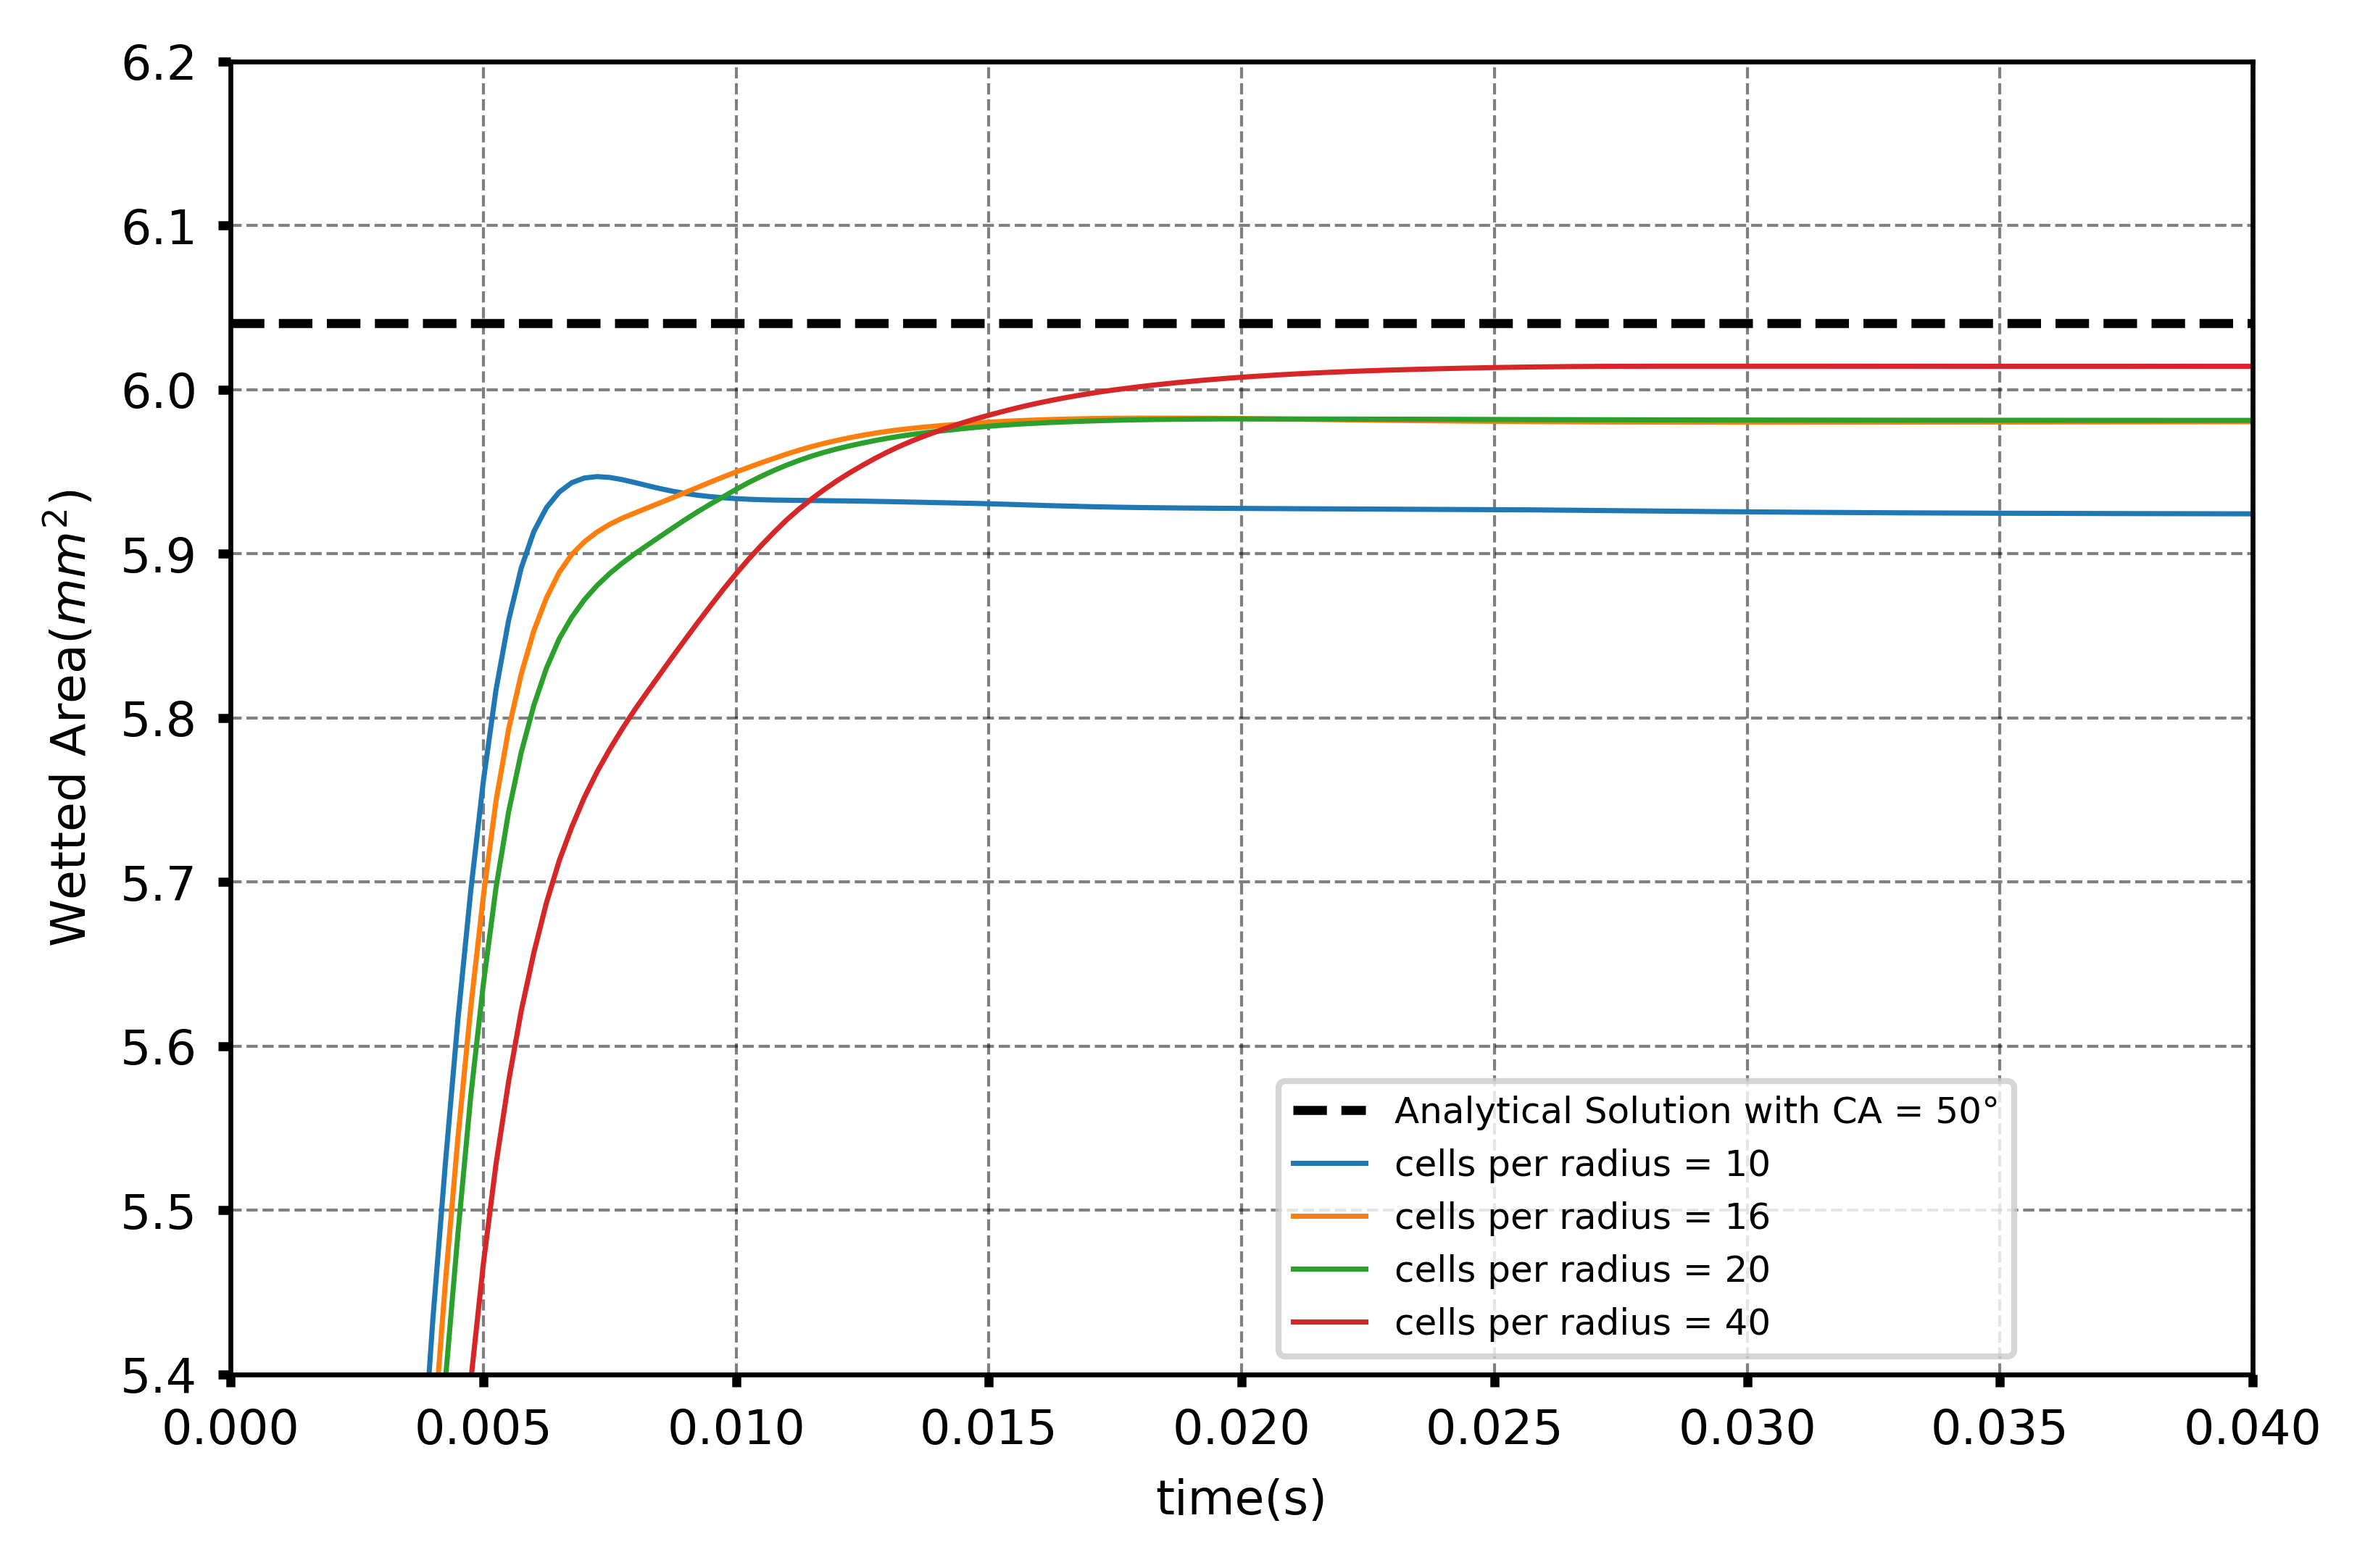

In [2]:
fluid = 'water_glycerol'
fluidLabel = 'wg'
contactAngle = 70
dropletRadius = 0.001 #1mm
cellsPerRadius = Funcs.fileMapping('wgtest70_')
theta = np.radians(contactAngle)

#######################################################################################

wettedAreaFileNames = Funcs.fileStructure('wettedArea.csv', 'wgtest70_')
print (wettedAreaFileNames)
plotLabels = ['cells per radius = ' + str(x) for x in cellsPerRadius]

#Reference solution 
plt.axhline(Funcs.getAnalyticalWettedArea(theta,dropletRadius), color='black',ls='dashed', linewidth=1.5, label = r"Stationary Solution with CA = "+str(contactAngle)+"°")

for idx, wettedAreaFile in enumerate(wettedAreaFileNames):
    pd.set_option('display.float_format', lambda x: '%.1f' % x)
    df = pd.read_csv(wettedAreaFile, index_col = 0)
    plt.xlim([0, 0.04])
    plt.ylim([5.4, 6.2])
    plt.plot(df, label=plotLabels[idx], linewidth=0.85)
    plt.grid(b=True, which='major', linestyle= 'dashed',color='black', alpha=0.5, lw=0.5)
    plt.tick_params(axis='both', direction='out', length=2, width=1.5,  grid_color='black', grid_alpha=0.5)
    #plt.title(r'Mesh convergence study' +'\n'+str(fluid), fontsize=fontSize)
    plt.xlabel(r"time(s)" ,color='black',fontsize=fontSize)
    plt.ylabel(r"Wetted Area($mm^2$)",color='black',fontsize=fontSize)
   # plt.legend(loc='lower center')
    plt.xticks(color='black',size = fontSize)
    plt.yticks(color='black',size = fontSize)
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

### Generate the plot
plt.legend(fontsize=8, loc='lower center', bbox_to_anchor=(0.72, 0), ncol=1)   
plt.savefig('mesh-convergence-study-'+str(fluid)+'_'+str(contactAngle)+'.pdf', bbox_inches='tight')
plt.savefig('mesh-convergence-study-'+str(fluid)+'_'+str(contactAngle)+'.png', bbox_inches='tight')
plt.show()


### Mesh convergence study for water_glycerol with contact angle $\theta_e=110^\circ$

['/home/asghar/ma11kuba/publications/dataForPreprint/benchmarkData/notebooks/DropletSpreadingTest/MeshConvergence/wgtest110_00016_case/postProcessing/wettedArea.csv', '/home/asghar/ma11kuba/publications/dataForPreprint/benchmarkData/notebooks/DropletSpreadingTest/MeshConvergence/wgtest110_00021_case/postProcessing/wettedArea.csv', '/home/asghar/ma11kuba/publications/dataForPreprint/benchmarkData/notebooks/DropletSpreadingTest/MeshConvergence/wgtest110_00026_case/postProcessing/wettedArea.csv', '/home/asghar/ma11kuba/publications/dataForPreprint/benchmarkData/notebooks/DropletSpreadingTest/MeshConvergence/wgtest110_00031_case/postProcessing/wettedArea.csv']


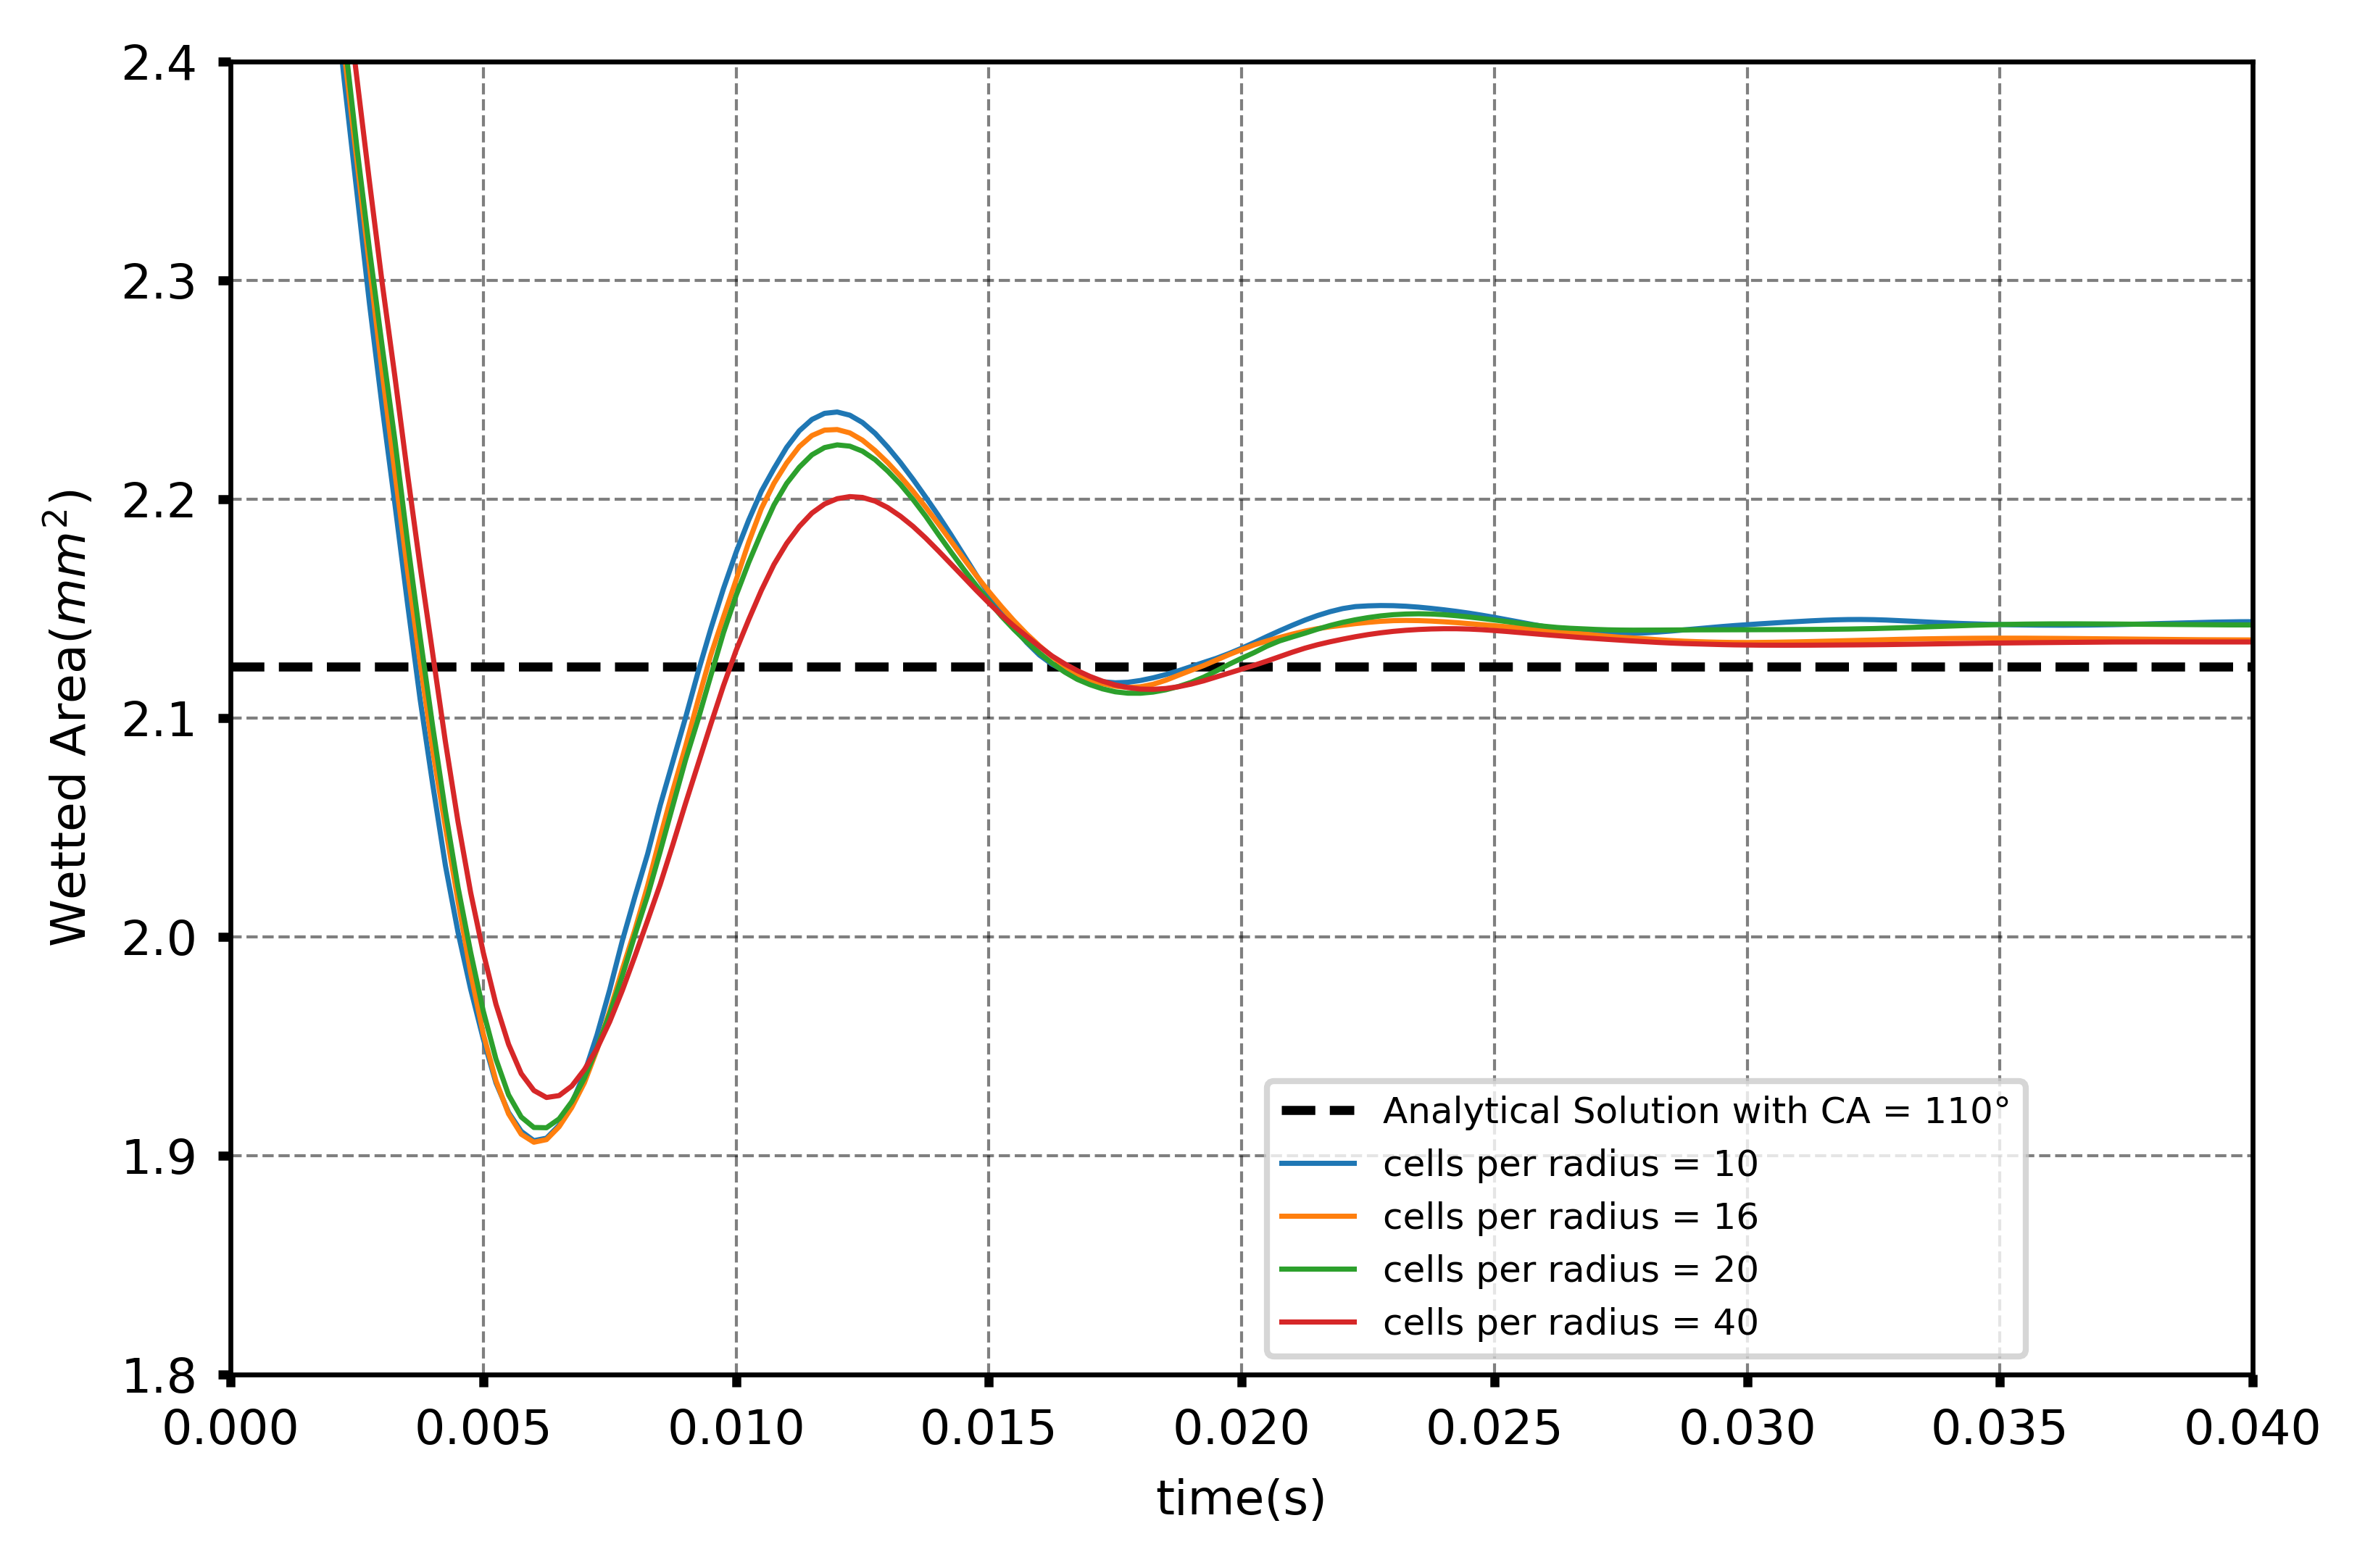

In [3]:
fluid = 'water_glycerol'
fluidLabel = 'wg'
contactAngle = 110
dropletRadius = 0.001 #1mm
cellsPerRadius = Funcs.fileMapping('wgtest110_')
theta = np.radians(contactAngle)

#######################################################################################

wettedAreaFileNames = Funcs.fileStructure('wettedArea.csv', 'wgtest110_')
print (wettedAreaFileNames)
plotLabels = ['cells per radius = ' + str(x) for x in cellsPerRadius]
#Reference solution 
plt.axhline(Funcs.getAnalyticalWettedArea(theta,dropletRadius), color='black',ls='dashed', linewidth=1.5, label = r"Stationary Solution with CA = "+str(contactAngle)+"°")

for idx, wettedAreaFile in enumerate(wettedAreaFileNames):
    pd.set_option('display.float_format', lambda x: '%.1f' % x)
    df = pd.read_csv(wettedAreaFile, index_col = 0)
    ### Create plot for every file
    plt.xlim([0, 0.04])
    plt.ylim([1.8, 2.4])
    plt.plot(df, label=plotLabels[idx], linewidth=0.85)
    #major grid lines
    plt.grid(b=True, which='major', linestyle= 'dashed',color='black', alpha=0.5, lw=0.5)
    plt.tick_params(axis='both', direction='out', length=2, width=1.5,  grid_color='black', grid_alpha=0.5)
    #plt.title(r'Mesh convergence study' +'\n'+str(fluid), fontsize=fontSize)
    plt.xlabel(r"time(s)" ,color='black',fontsize=fontSize)
    plt.ylabel(r"Wetted Area($mm^2$)",color='black',fontsize=fontSize)
   # plt.legend(loc='lower center')
    plt.xticks(color='black',size = fontSize)
    plt.yticks(color='black',size = fontSize)
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

### Generate the plot
plt.legend(fontsize=8, loc='lower center', bbox_to_anchor=(0.72, 0.0), ncol=1)   
plt.savefig('mesh-convergence-study-'+str(fluid)+'_'+str(contactAngle)+'.pdf', bbox_inches='tight')
plt.savefig('mesh-convergence-study-'+str(fluid)+'_'+str(contactAngle)+'.png', bbox_inches='tight')
plt.show()


### Mesh convergence study for water with contact angle $\theta_e=70^\circ$

['/home/asghar/ma11kuba/publications/dataForPreprint/benchmarkData/notebooks/DropletSpreadingTest/MeshConvergence/wtest50_00000_case/postProcessing/wettedArea.csv', '/home/asghar/ma11kuba/publications/dataForPreprint/benchmarkData/notebooks/DropletSpreadingTest/MeshConvergence/wtest50_00005_case/postProcessing/wettedArea.csv', '/home/asghar/ma11kuba/publications/dataForPreprint/benchmarkData/notebooks/DropletSpreadingTest/MeshConvergence/wtest50_00010_case/postProcessing/wettedArea.csv', '/home/asghar/ma11kuba/publications/dataForPreprint/benchmarkData/notebooks/DropletSpreadingTest/MeshConvergence/wtest50_00015_case/postProcessing/wettedArea.csv']


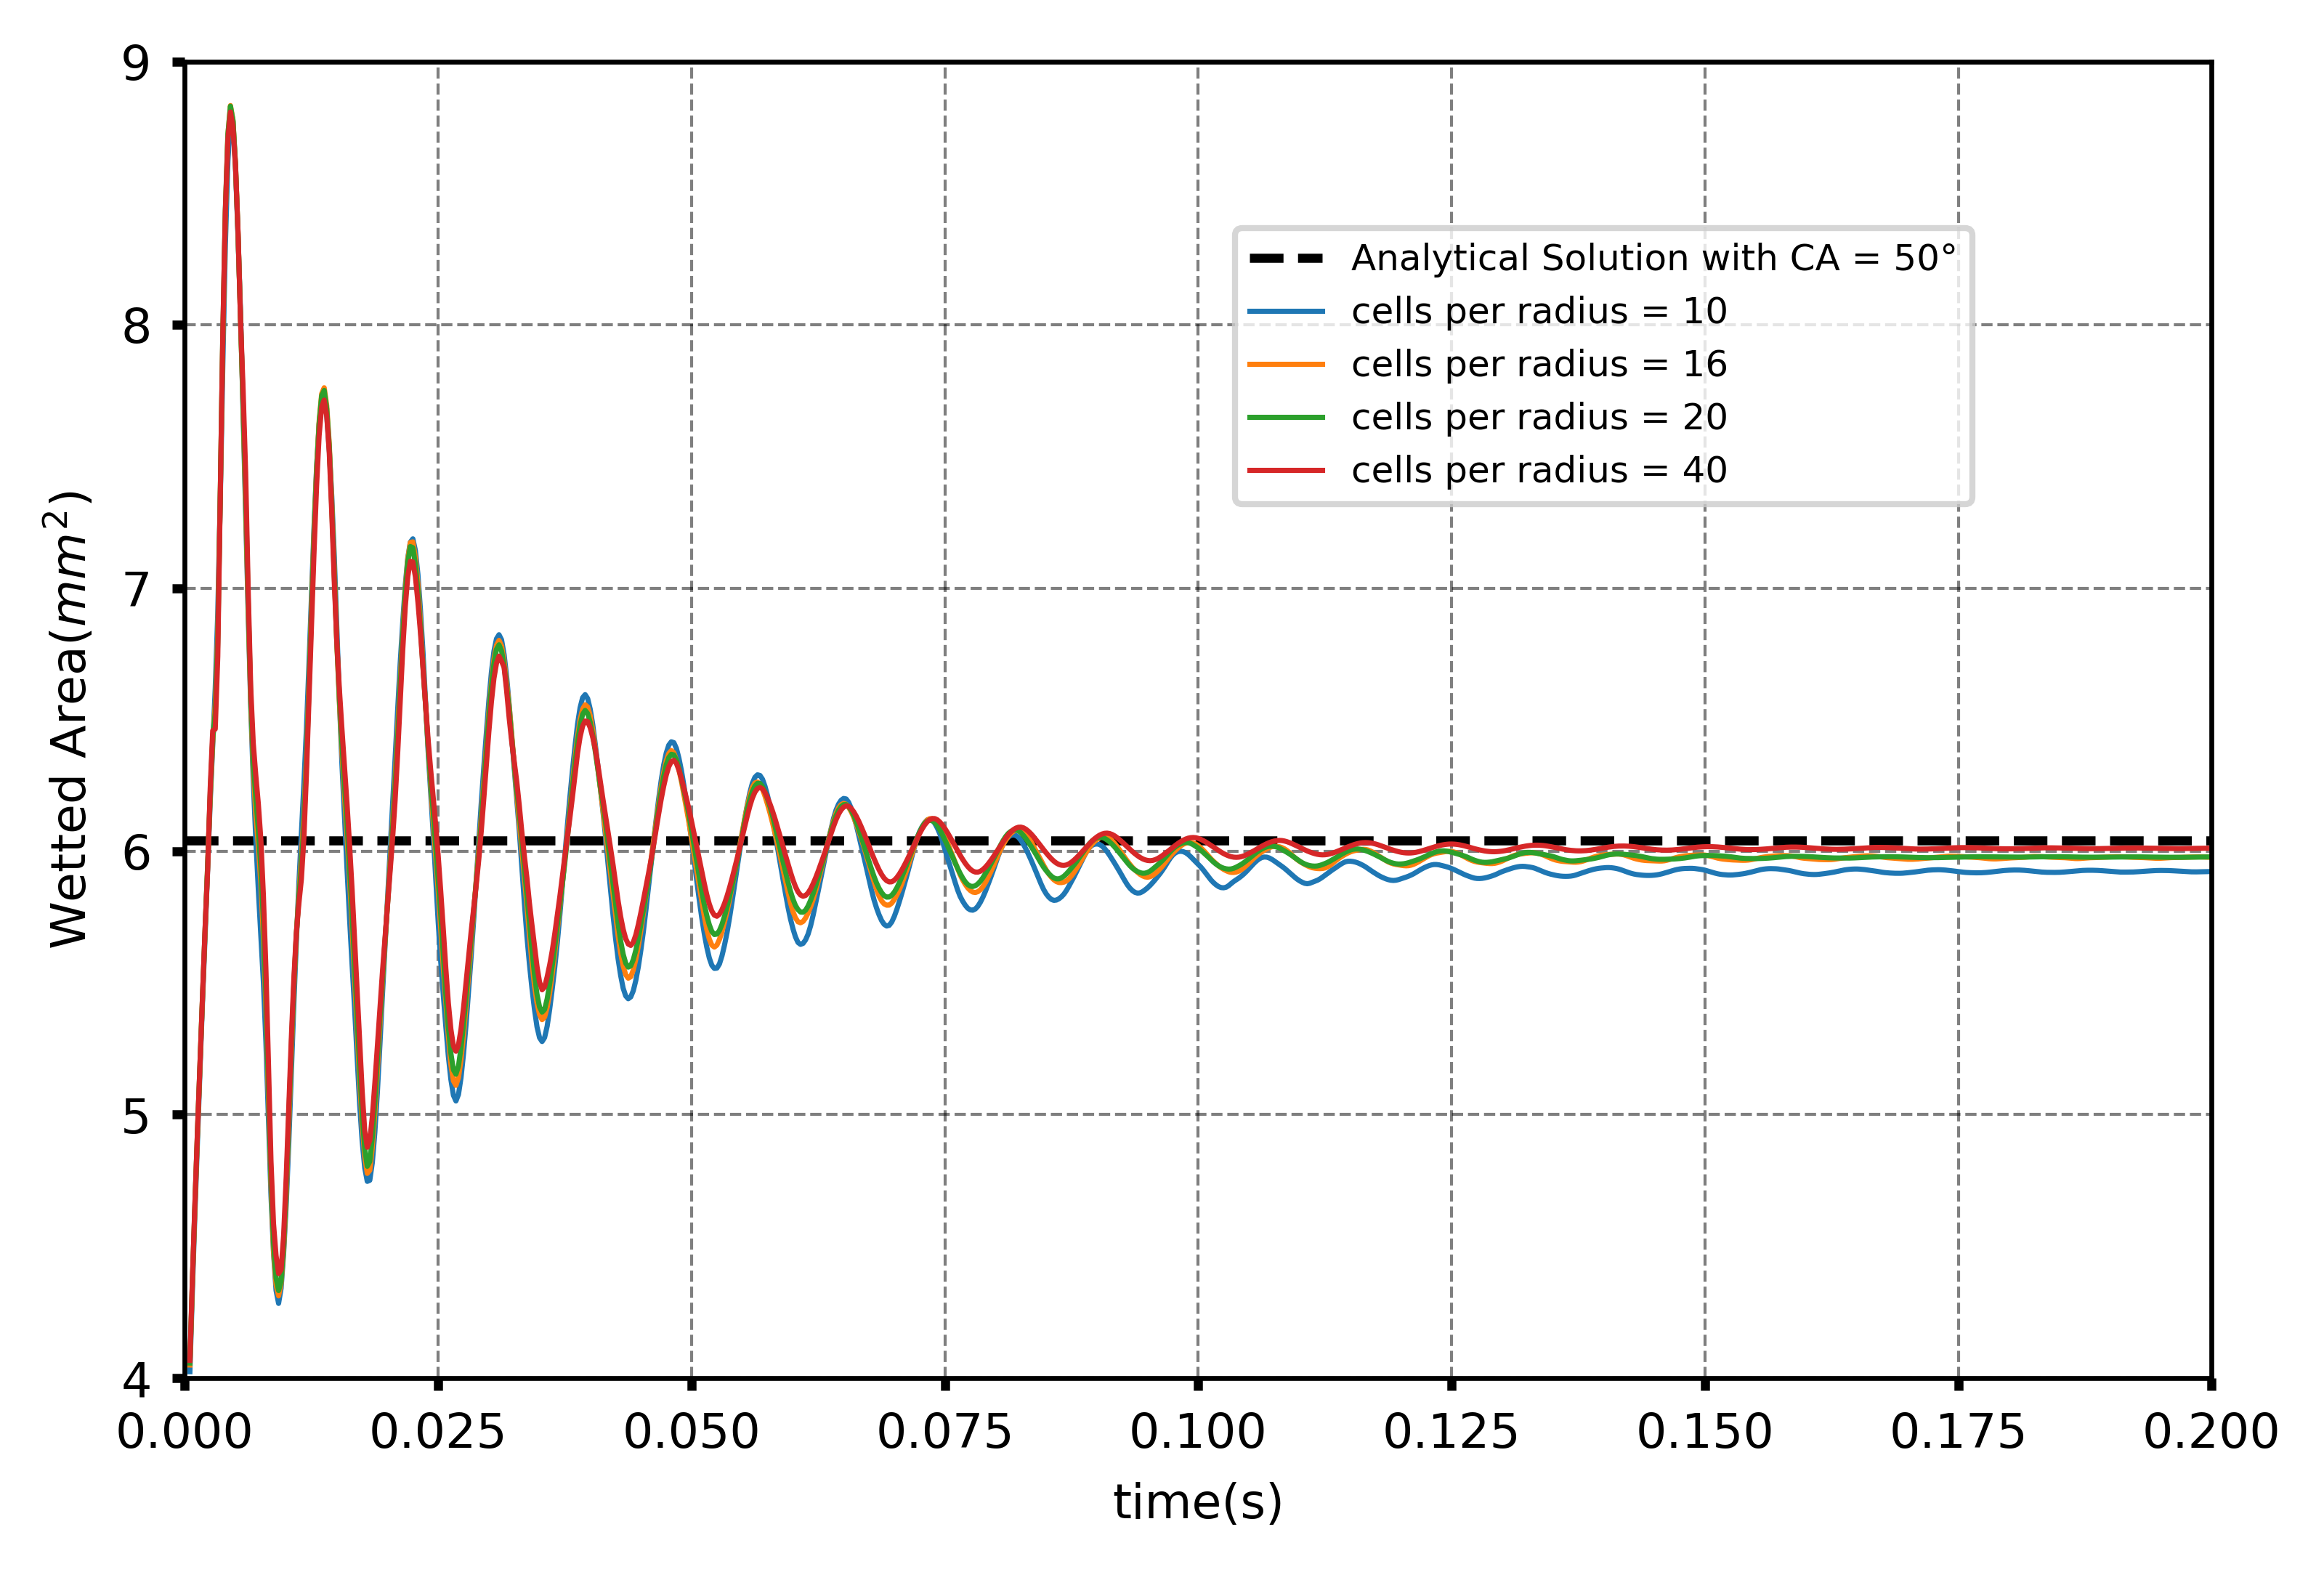

In [4]:
fluid = 'water'
fluidLabel = 'w'
contactAngle = 70
dropletRadius = 0.001 #1mm
cellsPerRadius = Funcs.fileMapping('wtest50_')
theta = np.radians(contactAngle)

#######################################################################################

wettedAreaFileNames = Funcs.fileStructure('wettedArea.csv', 'wtest70_')
print (wettedAreaFileNames)
plotLabels = ['cells per radius = ' + str(x) for x in cellsPerRadius]

#Reference solution 
plt.axhline(Funcs.getAnalyticalWettedArea(theta,dropletRadius), color='black',ls='dashed', linewidth=1.5, label = r"Stationary Solution with CA = "+str(contactAngle)+"°")

for idx, wettedAreaFile in enumerate(wettedAreaFileNames):
    pd.set_option('display.float_format', lambda x: '%.1f' % x)
    df = pd.read_csv(wettedAreaFile, index_col = 0)
    ### Create plot for every file
    plt.xlim([0, 0.2])
    plt.ylim([4, 9])
    plt.plot(df, label=plotLabels[idx], linewidth=0.85)
    plt.grid(b=True, which='major', linestyle= 'dashed',color='black', alpha=0.5, lw=0.5)
    plt.tick_params(axis='both', direction='out', length=2, width=1.5,  grid_color='black', grid_alpha=0.5)
    #plt.title(r'Mesh convergence study' +'\n'+str(fluid), fontsize=fontSize)
    plt.xlabel(r"time(s)" ,color='black',fontsize=fontSize)
    plt.ylabel(r"Wetted Area($mm^2$)",color='black',fontsize=fontSize)
   # plt.legend(loc='lower center')
    plt.xticks(color='black',size = fontSize)
    plt.yticks(color='black',size = fontSize)
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

### Generate the plot
plt.legend(fontsize=8, loc='lower center', bbox_to_anchor=(0.72, 0.68), ncol=1)   
plt.savefig('mesh-convergence-study-'+str(fluid)+'_'+str(contactAngle)+'.pdf', bbox_inches='tight')
plt.savefig('mesh-convergence-study-'+str(fluid)+'_'+str(contactAngle)+'.png', bbox_inches='tight')
plt.show()
 

### Mesh convergence study for water with contact angle $\theta_e=110^\circ$

['/home/asghar/ma11kuba/publications/dataForPreprint/benchmarkData/notebooks/DropletSpreadingTest/MeshConvergence/wtest110_00016_case/postProcessing/wettedArea.csv', '/home/asghar/ma11kuba/publications/dataForPreprint/benchmarkData/notebooks/DropletSpreadingTest/MeshConvergence/wtest110_00021_case/postProcessing/wettedArea.csv', '/home/asghar/ma11kuba/publications/dataForPreprint/benchmarkData/notebooks/DropletSpreadingTest/MeshConvergence/wtest110_00026_case/postProcessing/wettedArea.csv', '/home/asghar/ma11kuba/publications/dataForPreprint/benchmarkData/notebooks/DropletSpreadingTest/MeshConvergence/wtest110_00031_case/postProcessing/wettedArea.csv']


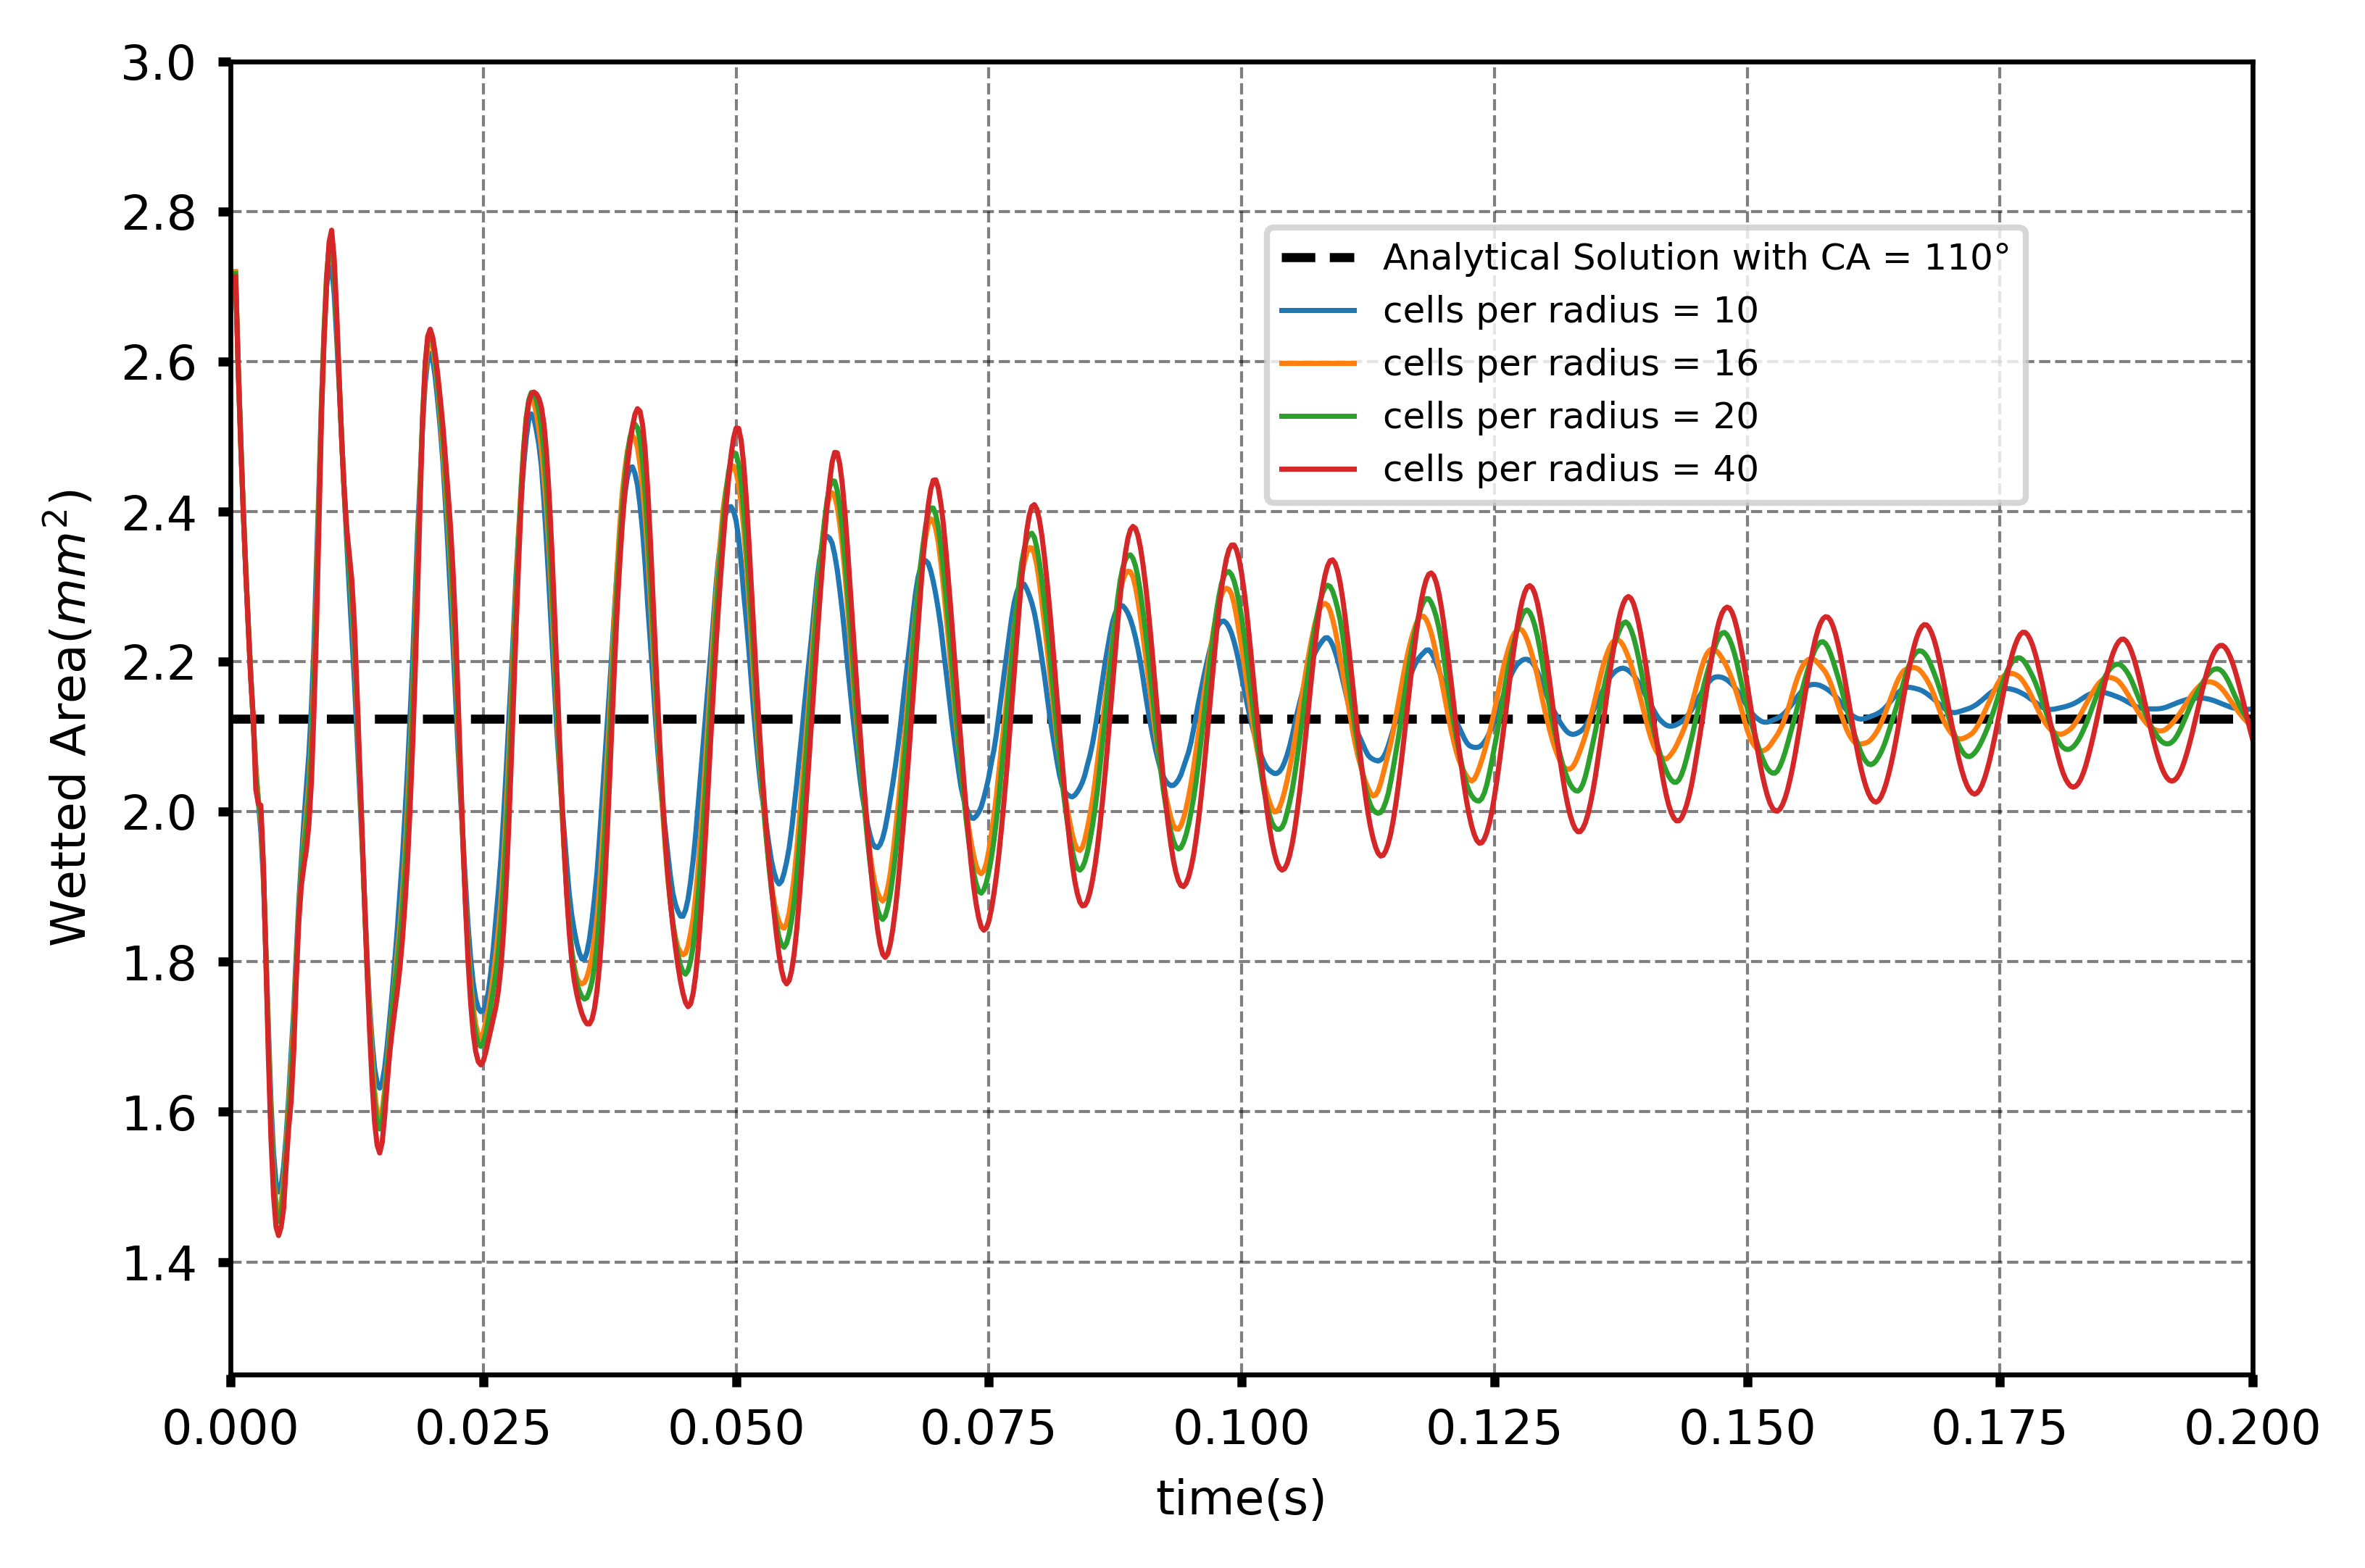

In [5]:
fluid = 'water'
fluidLabel = 'w'
contactAngle = 110
dropletRadius = 0.001 #1mm
cellsPerRadius = Funcs.fileMapping('wtest110_')
theta = np.radians(contactAngle)

#######################################################################################

wettedAreaFileNames = Funcs.fileStructure('wettedArea.csv', 'wtest110_')
print (wettedAreaFileNames)
plotLabels = ['cells per radius = ' + str(x) for x in cellsPerRadius]
#Reference solution 
plt.axhline(Funcs.getAnalyticalWettedArea(theta,dropletRadius), color='black',ls='dashed', linewidth=1.5, label = r"Stationary Solution with CA = "+str(contactAngle)+"°")

for idx, wettedAreaFile in enumerate(wettedAreaFileNames):
    pd.set_option('display.float_format', lambda x: '%.1f' % x)
    df = pd.read_csv(wettedAreaFile, index_col = 0)
    plt.ylim([1.25, 3])
    plt.xlim([0, 0.2])
    plt.plot(df, label=plotLabels[idx], linewidth=0.85)
    #major grid lines
    plt.grid(b=True, which='major', linestyle= 'dashed',color='black', alpha=0.5, lw=0.5)
    plt.tick_params(axis='both', direction='out', length=2, width=1.5,  grid_color='black', grid_alpha=0.5)
    #plt.title(r'Mesh convergence study' +'\n'+str(fluid), fontsize=fontSize)
    plt.xlabel(r"time(s)" ,color='black',fontsize=fontSize)
    plt.ylabel(r"Wetted Area($mm^2$)",color='black',fontsize=fontSize)
   # plt.legend(loc='lower center')
    plt.xticks(color='black',size = fontSize)
    plt.yticks(color='black',size = fontSize)
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

### Generate the plot
plt.legend(fontsize=8, loc='lower center', bbox_to_anchor=(0.72, 0.68), ncol=1)   
plt.savefig('mesh-convergence-study-'+str(fluid)+'_'+str(contactAngle)+'.pdf', bbox_inches='tight')
plt.savefig('mesh-convergence-study-'+str(fluid)+'_'+str(contactAngle)+'.png', bbox_inches='tight')
plt.show()

